<a href="https://colab.research.google.com/github/hernandezhdd/Mecanica_Estadistica/blob/main/Teorema_del_Lim_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Central Limit Theorem

### Esto es una copia modificada de una notebook de jonkrohn en GitHub, obtenida de:

https://gist.github.com/jonkrohn/7ca39598a521f72a9be6fbd2f581fd66

## Load dependencies

In [ ]:
import numpy as np
import seaborn as sns
import statistics as stat

### NOTA: 

Lo que mas ralentiza a esta notebook es el tercer parametro de la funcion ***sample_mean_calculator***. Mas abajo esta definido que es y que hace la funcion.

sample_mean_calculator(u, 1000, **ESTE NRO**)

Aparentemente tambien ***population_size***

## Simulating a normally-distributed population

In [ ]:
population_size=100000 # elijo el tamaño de la poblacion, debe ser grande para no muestrear varias veces los mismos datos

In [ ]:
x = np.random.normal(size=population_size) # at default parameters, will be "standard" normal distribution

## Distribucion normal

$ P \propto \exp{ \left( -{\frac {(x-\mu )^{2}}{2\sigma ^{2}}} \right) } $

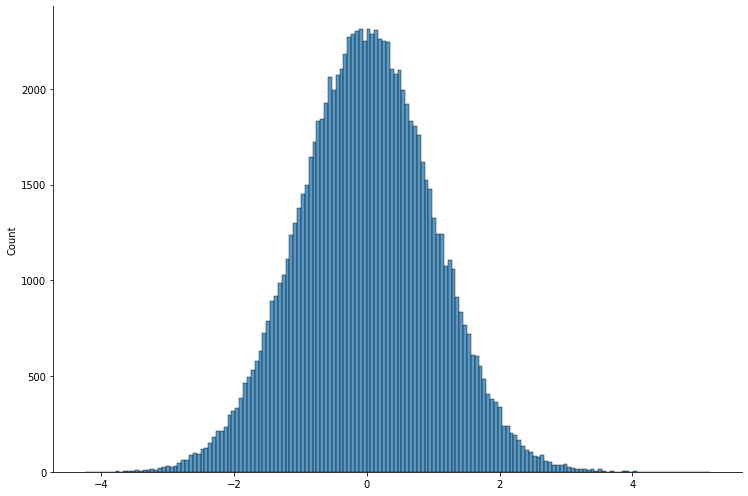

In [ ]:
import matplotlib.pyplot as plt

sns.displot(x, height=7, aspect=1.5) 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


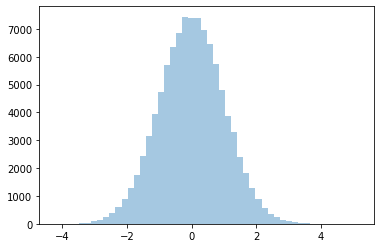

In [ ]:
sns.distplot(x, kde=False)

## Sampling from the normally-distributed population

In [ ]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.66444776, -1.53761588, -1.29546301,  1.9925051 , -0.79003892,
       -0.06893884,  0.3181686 , -0.30219698,  0.60938728, -1.14333607])

In [ ]:
stat.mean(x_sample)

-0.28819764753176297

## Define una funcion para muestrear de la distribucion de datos que tiene. Va a tomar ***n*** datos y los va a promediar. 
$\bar{x}_i = \frac{1}{n} \sum_{j=1}^{j=n} x_j$

Esto lo va a hacer ***m*** veces. Entonces vamos a tener ***m*** promedios.

$ S = \left\{ \bar{x}_1,\bar{x}_2,...,\bar{x}_m \right\} $

Este ultimo conjunto sera mi nueva "poblacion", y es lo que vamos a graficar.

### En la funcion n es ***sample_size*** y m es ***n_samples***

Esto no se si esta bien hecho, porque no se si no esta sampleando con reemplazo.

In [ ]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

Toma 10 muestras y las promedia. Repite el procedimiento 10 veces.

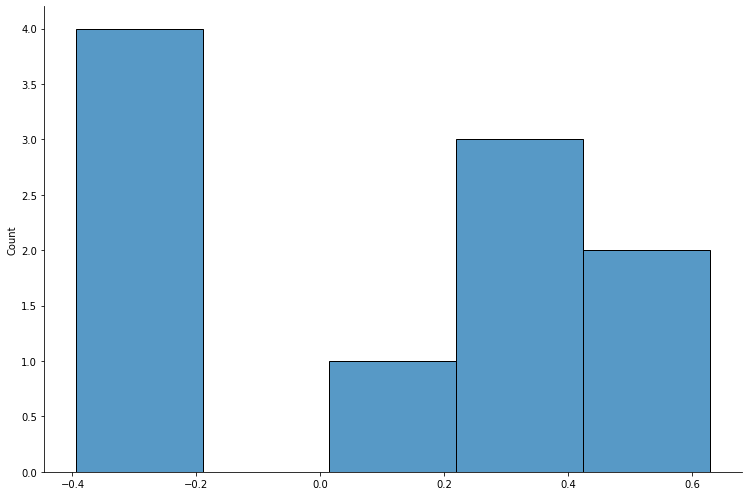

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 10, 10), height=7, aspect=1.5)

###### The more samples we take, the more likely that the sampling distribution of the means will be normally-distributed: 

**IMPORTANTE**

Cuantas mas muestras agarra y las promedia, mas se parece la distribucion a una gaussiana.

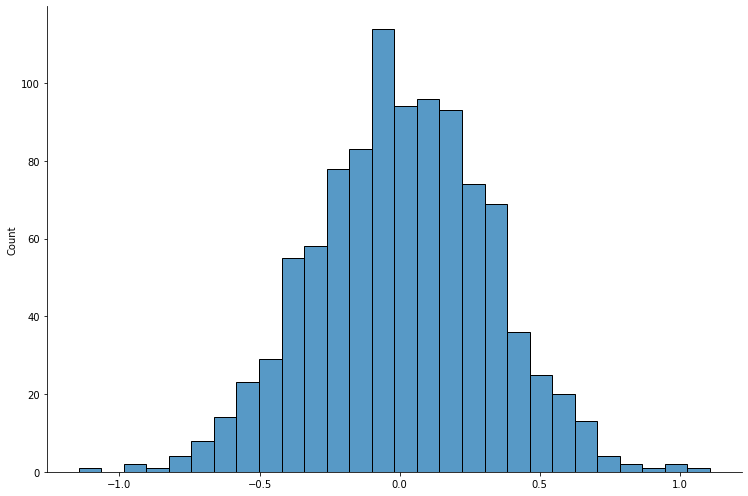

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 10, 1000), height=7, aspect=1.5)

###### The larger the sample, the tighter the sample means will tend to be around the population mean:

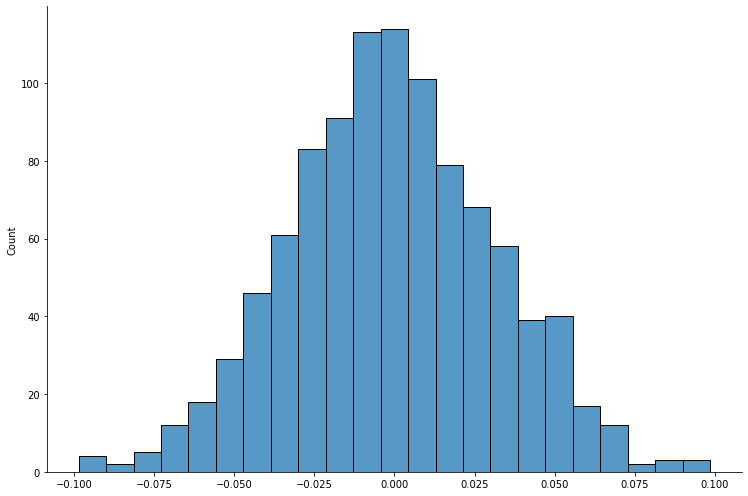

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 1000, 1000), height=7, aspect=1.5)

## Sampling from a skewed population

In [ ]:
from scipy.stats import skewnorm

In [ ]:
s = skewnorm.rvs(12, size=population_size)

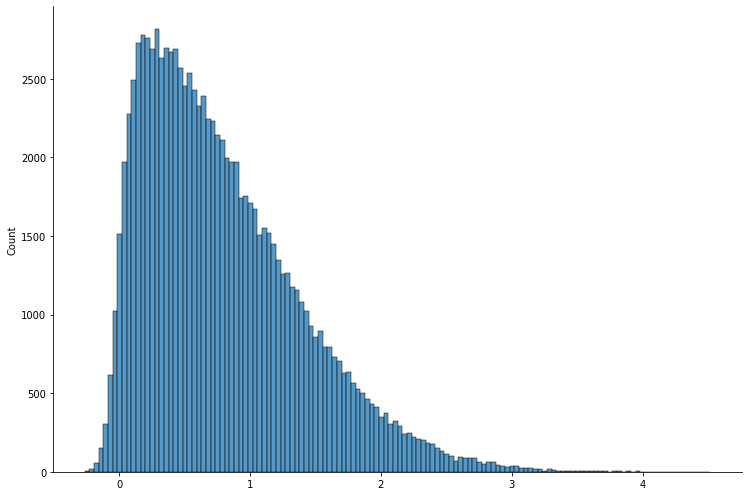

In [ ]:
sns.displot(s, height=7, aspect=1.5) 

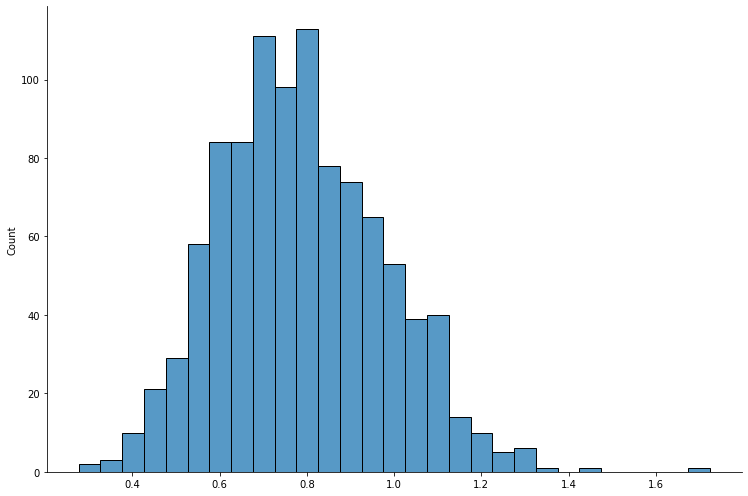

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), height=7, aspect=1.5) 

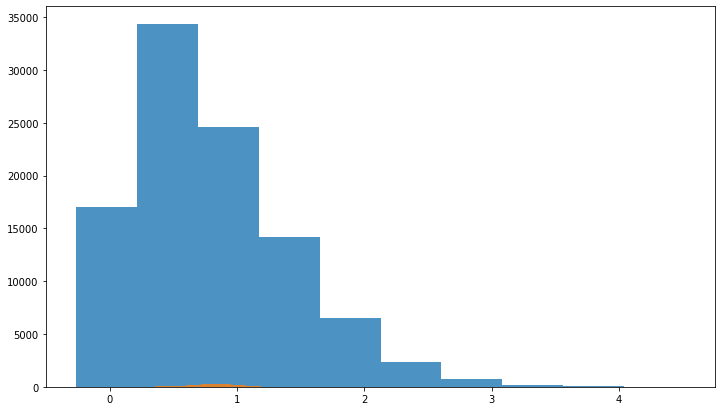

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.hist(s, alpha=0.8)
plt.hist(sample_mean_calculator(s, 10, 1000), alpha=0.8)

plt.show()

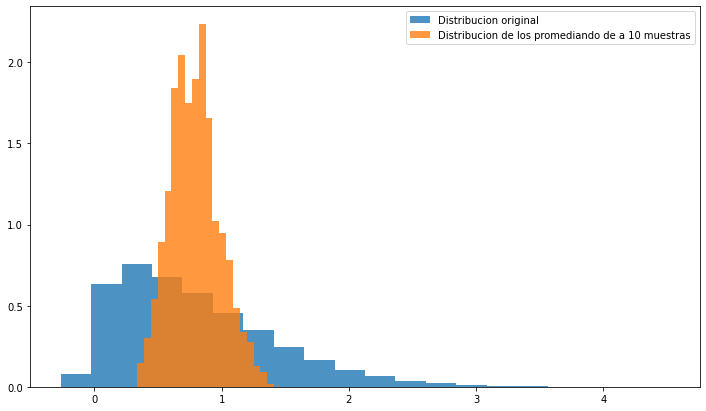

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.hist(s, alpha=0.8, density=True, bins=20, label='Distribucion original')
plt.hist(sample_mean_calculator(s, 10, 1000), alpha=0.8, density=True, bins=20, label='Distribucion de los promediando de a 10 muestras')

plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


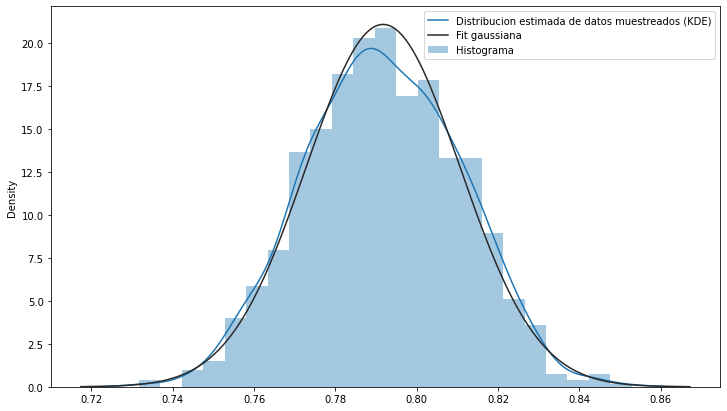

In [ ]:
from scipy.stats import norm

_ = sns.distplot(sample_mean_calculator(s, 1000, 1000), fit=norm) 

plt.legend(['Distribucion estimada de datos muestreados (KDE)', 'Fit gaussiana', 'Histograma'])

fig = plt.gcf()
fig.set_size_inches(12, 7)

## Sampling from a multimodal distribution

In [ ]:
m = np.concatenate((np.random.normal(size=population_size), np.random.normal(loc = 7.0, size= np.floor(population_size/3).astype(int) )))

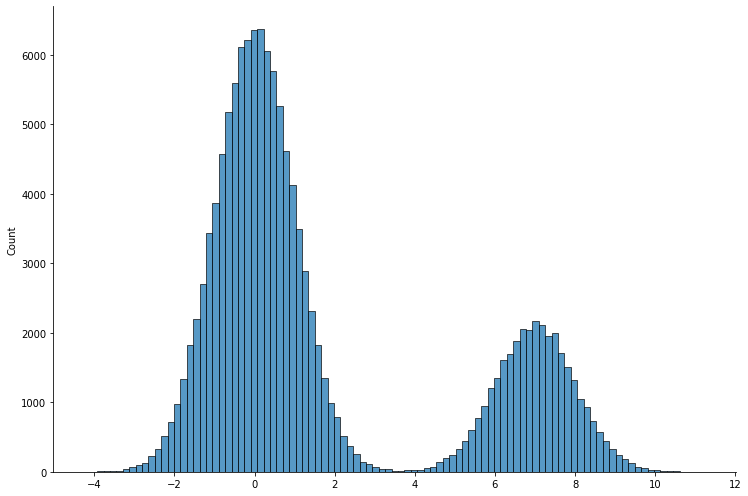

In [ ]:
_ = sns.displot(m, height=7, aspect=1.5) 

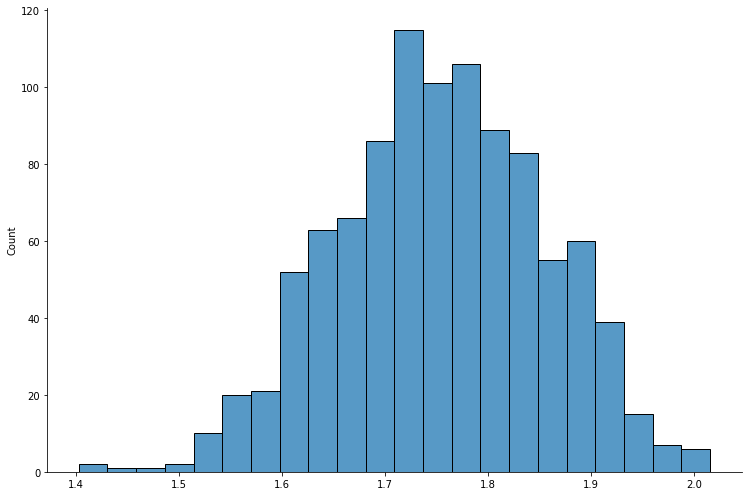

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), height=7, aspect=1.5) 

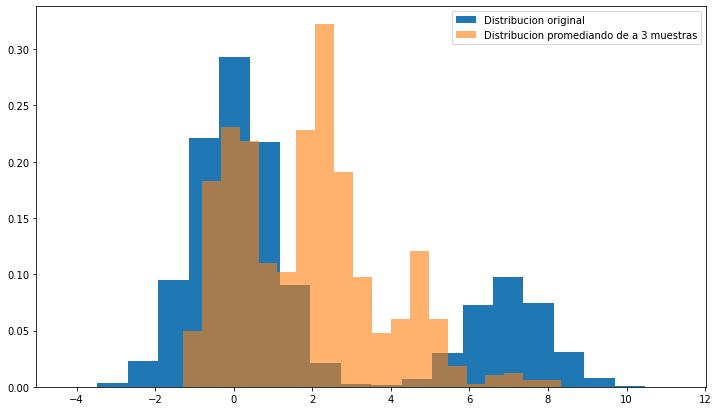

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.hist(m, alpha=1, density=True, bins=20, label='Distribucion original')
plt.hist(sample_mean_calculator(m, 3, 1000), alpha=0.6, density=True, bins=20, label='Distribucion promediando de a 3 muestras')
# plt.hist(sample_mean_calculator(m, 5, 1000), alpha=0.8, density=True, bins=20, label='Distribucion de los promedios de 3 muestras')

# plt.hist(sample_mean_calculator(m, 10, 1000), alpha=0.4, density=True, bins=20, label='Distribucion de los promedios de 10 muestras')
# plt.hist(sample_mean_calculator(m, 30, 1000), alpha=0.6, density=True, bins=20, label='Distribucion de los promedios de 100 muestras')

plt.legend()

plt.show()

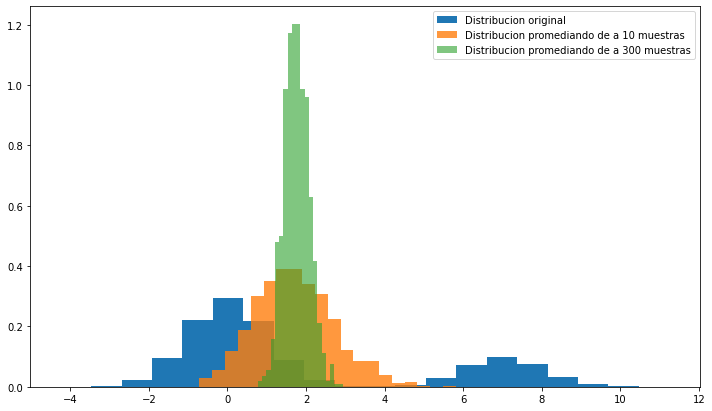

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

plt.hist(m, alpha=1, density=True, bins=20, label='Distribucion original')
# plt.hist(sample_mean_calculator(m, 3, 1000), alpha=0.8, density=True, bins=20, label='Distribucion de los promedios de 3 muestras')
plt.hist(sample_mean_calculator(m, 10, 1000), alpha=0.8, density=True, bins=20, label='Distribucion promediando de a 10 muestras')
plt.hist(sample_mean_calculator(m, 100, 1000), alpha=0.6, density=True, bins=20, label='Distribucion promediando de a 300 muestras')

plt.legend()

plt.show()

## Esto es analogo a cuando hacemos mediciones y vemos que la desviacion estandar disminuye al aumentar el numero de mediciones promediadas.

## Sampling means from *any* distribution produces a normal sampling distribution

## Distribucion uniforme

$ P \propto \frac{1}{L} \ , \  \{ \ 0 < x < L \ \} $

###### Even when sampling from a uniform population:

In [ ]:
u = np.random.uniform(size=population_size)

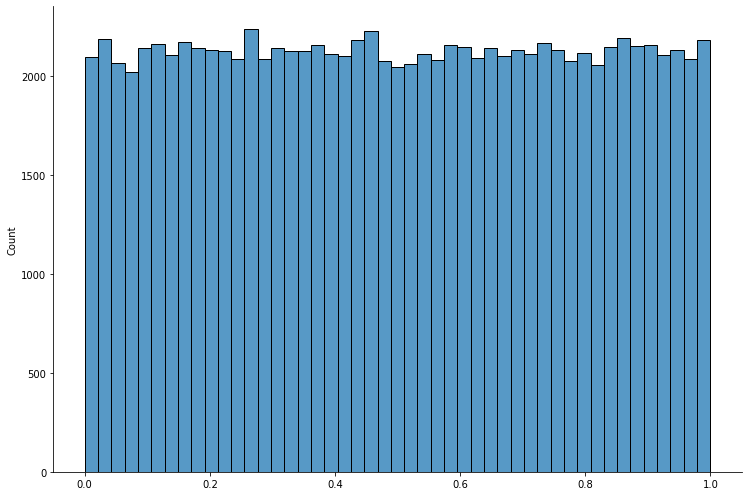

In [ ]:
_ = sns.displot(u, height=7, aspect=1.5) 

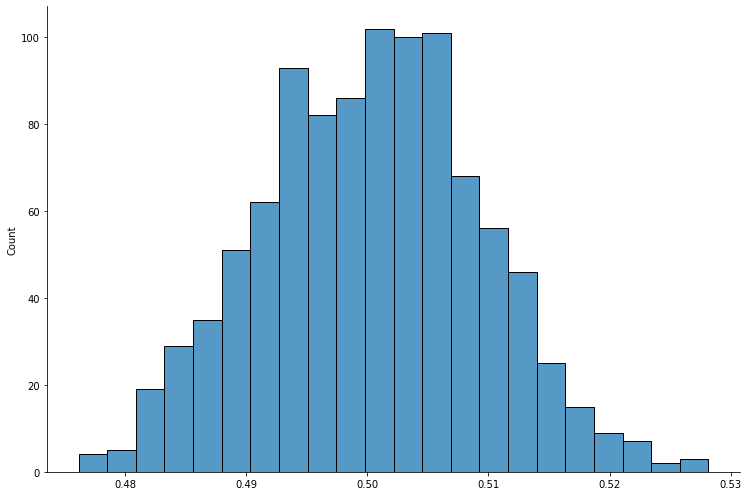

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), height=7, aspect=1.5) 

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to run statistical tests that are configured for normal distributions. All of the most popular statistical tests are configured this way.

As an example of such a statistical test, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group and a control group). Thanks to the central limit theorem, we can use this test *even if we have no idea what the underlying distribution of the population is*, which is most of the time.